In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from matplotlib import pyplot as plt
from scipy import stats

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# генерируем случайные данные
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

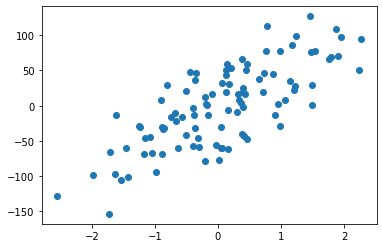

In [3]:
# посмотрим что получилось

pylab.plot(x, y, 'o')
pylab.show()

In [4]:
# размер данных

m, n = np.shape(x)
m, n

(100, 1)

In [5]:
# преобразуем x к следующему виду
x = np.c_[ np.ones(m), x]
x[:5]

array([[ 1.        , -0.35955316],
       [ 1.        ,  0.97663904],
       [ 1.        ,  0.40234164],
       [ 1.        , -0.81314628],
       [ 1.        , -0.88778575]])

In [6]:
# y лист значений
y[:5]

array([-31.74599395, -28.79914206,  -2.18450294,  28.96679712,
       -30.8791169 ])

### Сначала вручную

In [7]:
# шаг алгоритма
alpha = 0.01

In [8]:
def gradient_descent_2(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска. На каждом шаге выводится значение функции потерь
    """
    
    m = x.shape[0] # 100
    theta = np.ones(2) # [ 1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # функция потерь, функция качества модели
        
        #print( "iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
        
    return theta

GRADIENT = (X_T * веса) / количество_данных

1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4

1 1 1 1 1 1 1 1 1 1 1 1    0.4
2 2 2 2 2 2 2 2 2 2 2 2    0.334
3 3 3 3 3 3 3 3 3 3 3 3    0.34
4 4 4 4 4 4 4 4 4 4 4 4    0.23


In [9]:
%%time
theta = gradient_descent_2(alpha, x, y, 1000)

CPU times: user 33 ms, sys: 9.62 ms, total: 42.6 ms
Wall time: 35.5 ms


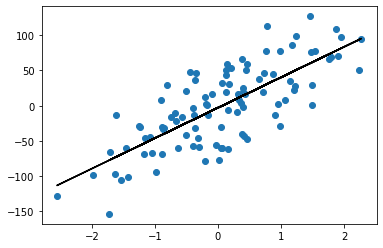

In [10]:
# построим полученную линию из theta
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    
# рисуем результат
pylab.plot(x[:,1],y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()

In [11]:
x.shape[1]

2

In [13]:
for i in range(x.shape[1]):
    y_predict = theta[0] + theta[1]*x 
    #print(theta[0],theta[1], y_predict)

### Используем готовые методы

In [14]:
from sklearn import linear_model

In [15]:
model = linear_model.SGDRegressor( alpha = 0.01, max_iter = 1000 )

In [16]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35)

In [17]:
%%time 

model.fit( x, y )

CPU times: user 1.49 ms, sys: 575 µs, total: 2.07 ms
Wall time: 1.33 ms


SGDRegressor(alpha=0.01)

In [18]:
model.intercept_, model.coef_

(array([-2.85262359]), array([42.77747379]))

In [19]:
y_predict_sgd = model.predict( x )

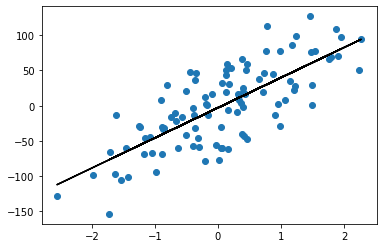

In [20]:
pylab.plot(x, y, 'o')
pylab.plot(x, y_predict_sgd, 'k-')
pylab.show()

Градиентный спуск логистической регрессии
==========

Дата сет для классификации

In [55]:
from sklearn.datasets import make_blobs

In [56]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
X.shape, y.shape

((100, 2), (100,))

In [57]:
X[:5]

array([[-0.79415228,  2.10495117],
       [-9.15155186, -4.81286449],
       [-3.10367371,  3.90202401],
       [-1.42946517,  5.16850105],
       [-7.4693868 , -4.20198333]])

In [58]:
y[:5]

array([0, 1, 0, 0, 1])

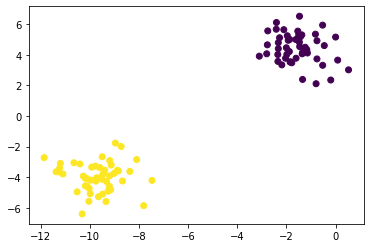

In [59]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y[:])
plt.show()

In [60]:
# преобразуем x к следующему виду
X = np.c_[ np.ones(m), X]
X[:5]

array([[ 1.        , -0.79415228,  2.10495117],
       [ 1.        , -9.15155186, -4.81286449],
       [ 1.        , -3.10367371,  3.90202401],
       [ 1.        , -1.42946517,  5.16850105],
       [ 1.        , -7.4693868 , -4.20198333]])

In [61]:
def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(m, y, h):
    return -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


def gradient_descent_log_reg(alpha, x, y, numIterations):
    """
    Функция реализует алгоритм градиентного спуска для логистической регрессии
    """
    m = x.shape[0] # 100
    theta = np.ones(3) # [ 1.  1.  1.] ВЕСА МОДЕЛИ!!!
    x_transpose = x.transpose() # транспонированная матрица x
    
    for iter in range( 0, numIterations ):
        hypothesis = sigmoid(np.dot(x, theta)) # матричное произведение
        J = cross_entropy(m, y, hypothesis)
        gradient = np.dot(x_transpose, hypothesis - y) / m  
        theta = theta - alpha * gradient
        
    return theta

In [62]:
%%time
alpha = 0.0001
theta = gradient_descent_log_reg(alpha, X, y, 1000)

CPU times: user 49.4 ms, sys: 2.91 ms, total: 52.3 ms
Wall time: 52.9 ms


In [64]:
theta

array([1.00252579, 0.58953876, 0.5901409 ])

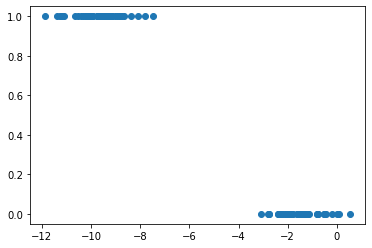

In [68]:
y_pred = []
for i in X:
    y_pred.append(int(round(1/(1+np.exp(1*(theta[0] + theta[1]*i[1] + theta[2]*i[2]))),0)))
plt.plot(X[:,1],y_pred,'o')
plt.show()

In [69]:
df = pd.DataFrame({'y_origin': y, 'y_predicted': np.array(y_pred)}, columns=['y_origin','y_predicted'])
df.head(10)

,y_origin,y_predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,0,0


In [73]:
x2 = []
for i in X:
    x2.append((- theta[0] - theta[1]*i[1])/theta[2])

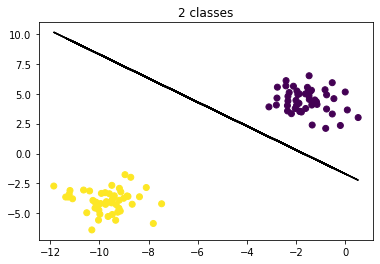

In [76]:
plt.figure()
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.title('2 classes')
pylab.plot(X[:,1],x2,'k-')
pylab.show()

Готовый метод из sklearn
========

In [77]:
model_reg = linear_model.SGDClassifier(alpha = 0.000001, max_iter = 1000)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [81]:
model_reg.fit(X_train, y_train)

SGDClassifier(alpha=1e-06)

In [82]:
y_predict_sgd = model_reg.predict(X_test)

In [83]:
model_reg.score(X_test, y_test)

1.0